# About the Data
We have a collection of continuous and categorical data extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker. It contains 15 different variables about people that have either made over or under 50,000 dollars in a year. I decided to look at this set of data because I wanted to see what were some factors that would help predict one's income. 50,000 dollars in 1994 adjusted for inflation today is equal to 84,541.84 dollars. 

The data was downloaded from kaggle and can be seen here: https://www.kaggle.com/uciml/adult-census-income

# Food for Thought

1. What are the 3 most prevalent factors that people that make over 50k have?

2. Does having a higher education level mean that you will have more income, and potentially work less?

3. Is there a difference in incomes between sexes?. What about race? 


Now, you can start working on your draft. You can do your first draft as:

- You can think of all the graphs that can answer the question, you can create as many graphs as you can (scatter plots, bar graphs, pie chart, boxplot, line plot, histogram, etc.)
- You can filter your data to different categories (as education, age, etc.) and graph them.
- You can observe the correlations between data by using scatter plot
- You can think of how to apply t-test to answer the hypothesis
- You should separate graphs for each question
- You should include pie charts, bar graphs, histograms in your report
- You should have analysis below each graph
- You should include the introduction and conclusion
- Email me your draft via github link as you complete it (do not submit it via Thinkful yet)

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
df = pd.read_csv('adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
def ControlFor(x):
    return sum(x=='?')
df.apply(ControlFor)

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

There seems to be unknowns for workclass, occupation, and native country. I decided to omit the unknowns in workclass later on, assume that unknowns in native country mean non USA native, and omit the use of occupation as a variable.

In [5]:
#Omitting the '?' so that my graph doesn't look as jarring later on. 
data = df[df.workclass !='?']

In [6]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [7]:
df.shape

(32561, 15)

In [8]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
# There were too many countries listed initially so I decided to simplify it by setting it as either USA or non USA.
df.loc[df['native.country']!='United-States', 'native.country'] = 'non_usa'

# Question 1 

What are the 3 most prevalent factors that people that make over 50k have?

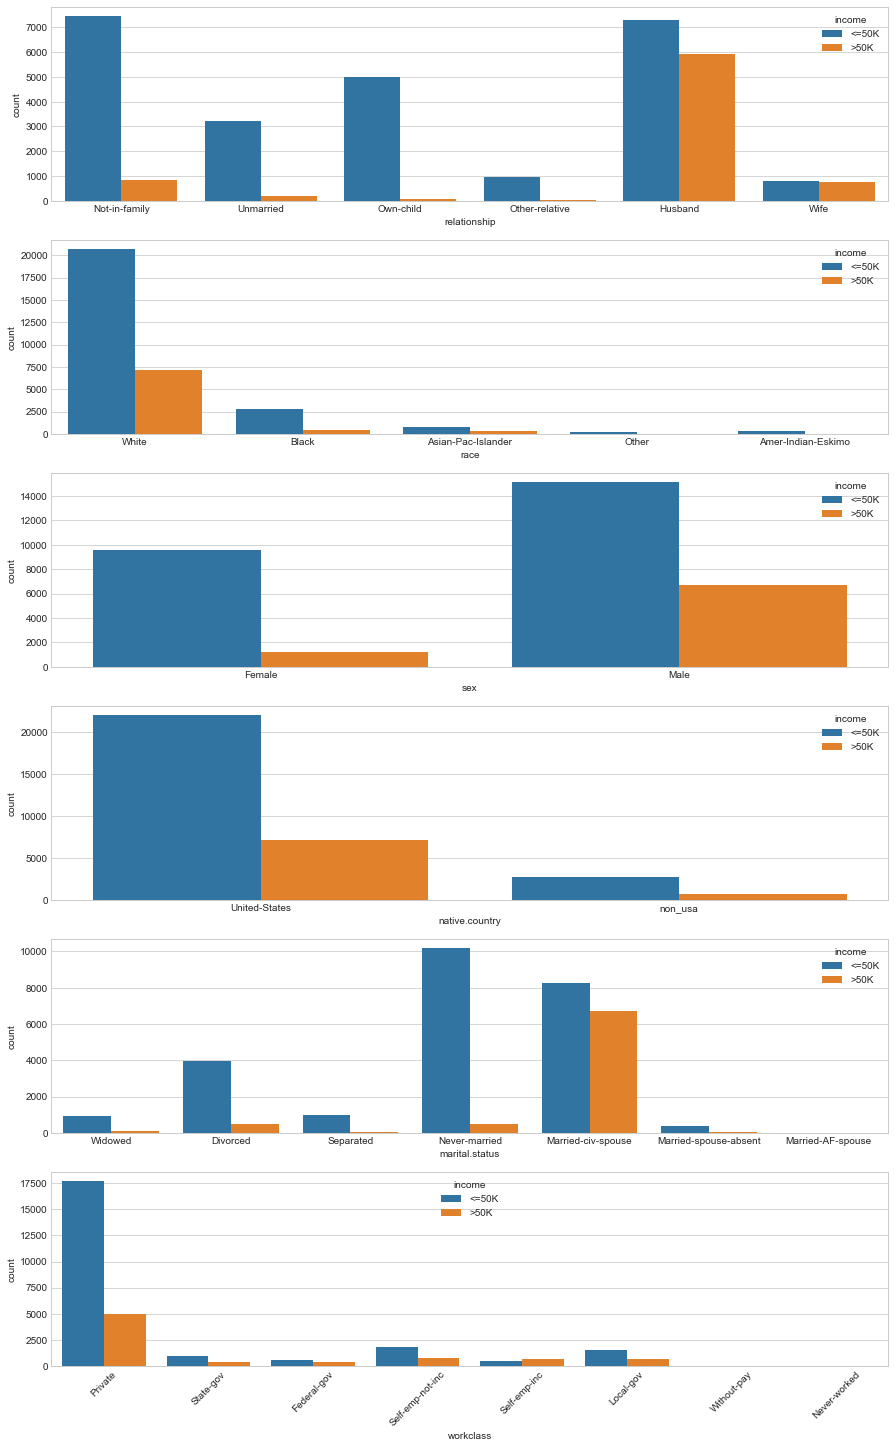

In [32]:
fig, (a, b, c, d, e, f) = plt.subplots(6,1,figsize=(15,25))
plt.xticks(rotation=45)
sns.countplot(df['relationship'],hue=df['income'],ax=a)
sns.countplot(df['race'],hue=df['income'],ax=b)
sns.countplot(df['sex'],hue=df['income'],ax=c)
sns.countplot(df['native.country'],hue=df['income'],ax=d)
sns.countplot(df['marital.status'],hue=df['income'],ax=e)
sns.countplot(data['workclass'],hue=df['income'],ax=f)
#I used data instead of df to omit the question mark in the data.

plt.show()

Although each of the graph's y axis has a different max count, we can still see that each graph has a certain x variable where those that make over 50,000 dollars a year cluster together. Additionally, we can see that married couples, who are husbands that are white with US citizenship and works in the private sector seem to be the majority of the people that made over 50,000 that year. Lets use a box plot next to look at age and hours per week since I didn't include those.  

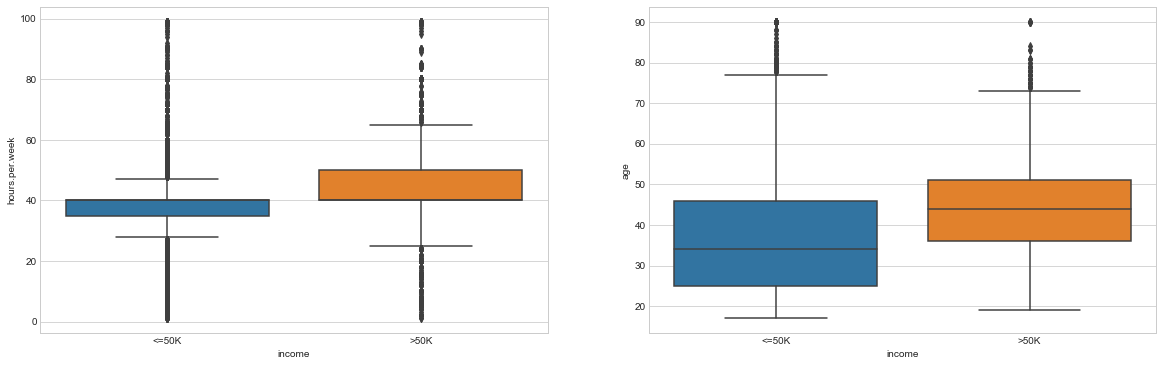

In [33]:
fig, (a,b) = plt.subplots(1,2,figsize=(20,6))
sns.set_style("whitegrid")
sns.boxplot(y='hours.per.week',x='income',data=df,ax=a)
sns.boxplot(y='age',x='income',data=df,ax=b)

plt.show()

It seems that the median of both groups for hours per week is 40 hours, but those that work over 40 hours are more likely to earn over 50k. There seems to be a lot of outliers in the hours per week graph but we will try to focus on the median of the groups in the graph since we are trying to look for the majority of the people. As age goes up, the likelihood of earning more than 50k also increases for the sample as a whole.

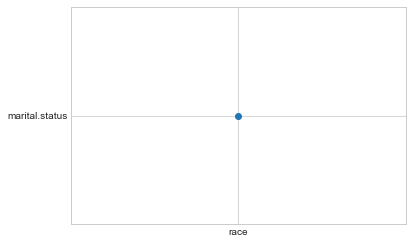

In [12]:
plt.scatter(x='race', y='marital.status')

plt.show()

# Answering Question 1 

The highest counts for the various plots made above were the categories gender: male at ~7000, race: white at ~6000 and marital status: married at ~7000. However, I don't believe that we have seen the full story yet since this is only a surface level analysis of the data presented. Lets dive deeper. 

# Question 2

Does having a higher education level mean that you will have more income, and potentially work less?

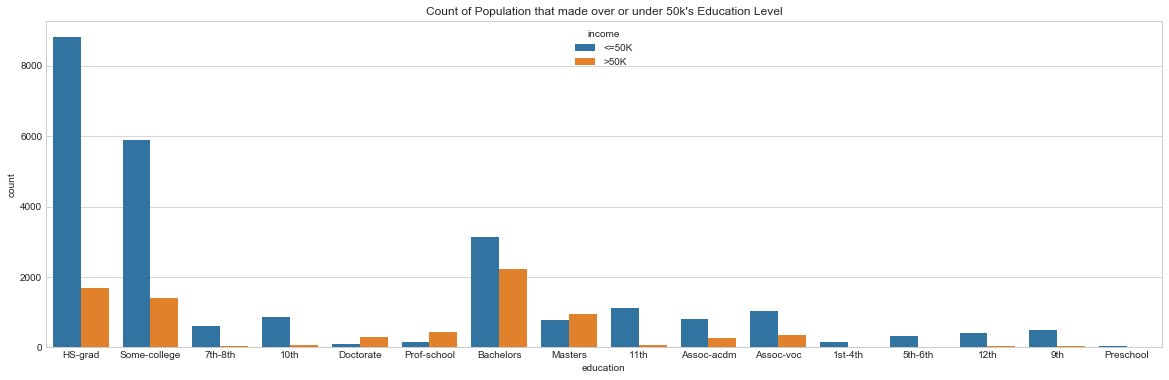

In [13]:
fig, ax = plt.subplots(figsize=(20,6))
sns.set_style("whitegrid")
sns.countplot(df['education'],hue=df['income'])
ax.set_title("Count of Population that made over or under 50k's Education Level")

plt.show()

Here, we notice that a lot of people with bachelor degrees made over 50k. In fact, they are the majority of the people that made over 50k. My parents have always told us that the better our education, the better our financial outcome will be. However, if we look at those with masters and doctorates, we see that yes, the majority in those groups did make more than 50k, but there are also those that are still making less than 50k a year. Lets try to dive deeper into it. 

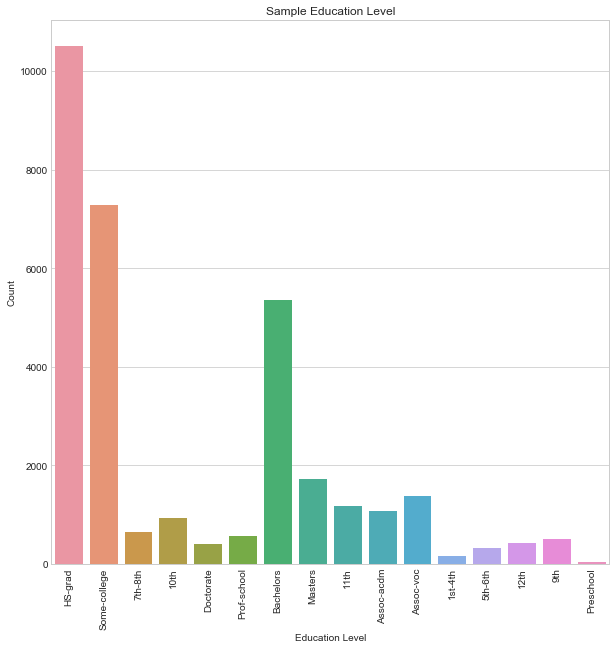

In [31]:
# Setting up parameters so that I can create a bar plot. 

def dict(data):
    y_values = {}
    
    for level in data:
        if y_values.get(level):
            y_values[level] += 1
        else:
            y_values[level] = 1
   
    return y_values
            
edu = dict(df['education'].values)

fig, ax = plt.subplots(figsize=(10,10))
sns.set_style("whitegrid")
sns.barplot(x=list(edu.keys()), y=list(edu.values()),data=df)
ax.set(xlabel='Education Level', ylabel='Count')
plt.title('Sample Education Level')
plt.xticks(rotation = 90)

plt.show()


Without the addition of looking at income, we can see that the majority of people have graduated high school, the second most common feature is that people don't finish college and the third most common occurence is people graduating college. Next, let's see how much these people with different education levels work.

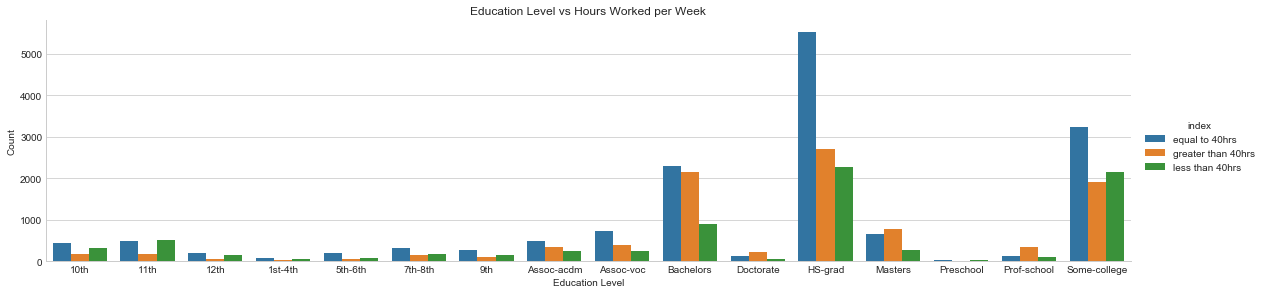

In [30]:
# There are too many different hours that could be reported so for simplicity sake, we will set up parameters 
# so that 'hours per week' will only contain <40 hours, 40 hours, and >40 hours worked. 

def diff_hours(hours_worked):
    cat_hours = {}
    
    for hour in hours_worked:
        if cat_hours.get(hour[1]) == None:
            cat_hours[hour[1]] = {'less than 40hrs':0, 'equal to 40hrs':0, 'greater than 40hrs':0}
        if hour[0] < 40:
            cat_hours[hour[1]]['less than 40hrs'] += 1
        elif hour[0] == 40:
            cat_hours[hour[1]]['equal to 40hrs'] += 1
        else:
            cat_hours[hour[1]]['greater than 40hrs'] += 1 
        
    return cat_hours
           
stats = diff_hours(df[['hours.per.week','education']].values)
df_stats = pd.DataFrame(stats)
df_stats = df_stats.reset_index()
df_stats = pd.melt(df_stats, id_vars=['index'])

sns.set_style("whitegrid")
sns.factorplot(x='variable', y='value', hue='index', data=df_stats, kind='bar', aspect=4)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Level vs Hours Worked per Week')

plt.show()

We see from this graph that overwhemingly, no matter what one's education level is, that person will still work 40 hours or more. The less educated a person is the less that person seeems to work. This may be because of employment opportunities or inability to hold down a job. Lastly, we can see from the graph that, the more educated a person is, the more likely that person will ultimately end up working more than 40 hours a week. 

A person may make more money the better educated that person is, but that person will more likely than not, work harder too. 

# Question 3 
Is there a difference in incomes between sexes?. What about race?

In [ ]:
#Some thoughts
# lets do a t test on sex since it will be applicable and convenient 
#should i move the countplots down from question 1?
#How should I apply a scatterplot here? Sex and income? box whisker maybe?
